In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
python.exe -m pip install --upgrade pip

SyntaxError: invalid syntax (842801469.py, line 1)

In [3]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 1.4 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.8 MB 1.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 1.2 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

In [4]:
pip install joblib shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 1.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 4.7 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 3.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.8/2.8 MB 2.8 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 2.5 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 2.3 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 1.8 MB/s  0:00:01
   ---------------------------------------- 0.0/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.37.0 requires pandas<2.3.0,>=1.1, but you have pandas 2.3.0 which is incompatible.
sktime 0.37.0 requires scikit-learn<1.7.0,>=0.24, but you have scikit-learn 1.7.0 which is incompatible.


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

import joblib
import shap

sns.set(style="whitegrid")
%matplotlib inline


In [6]:
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset Shape:",df.shape)
df.head()
df.info()
df.isnull().sum()

Dataset Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df= df.drop(columns=["customerID"])

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")




In [7]:
df["TotalCharges"].isnull().sum()

np.int64(11)

In [8]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [9]:
df["TotalCharges"].isnull().sum()

np.int64(0)

In [10]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [11]:
print(df.dtypes)
print(df.head())


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLin

C:\Users\aggra\AppData\Local\Temp\ipykernel_22824\1049768016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


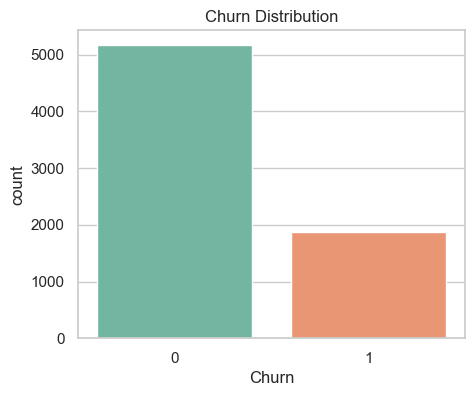

Churn Rate: 26.54%


In [12]:
# --- Target variable distribution ---
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

churn_rate = df["Churn"].mean()
print(f"Churn Rate: {churn_rate:.2%}")


In [14]:
num_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


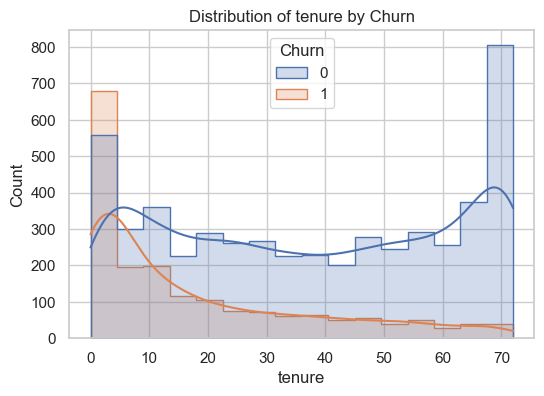

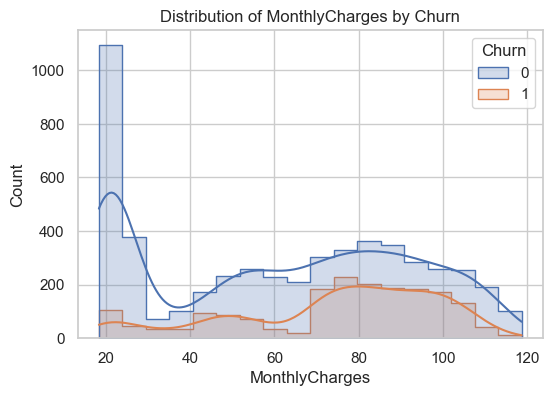

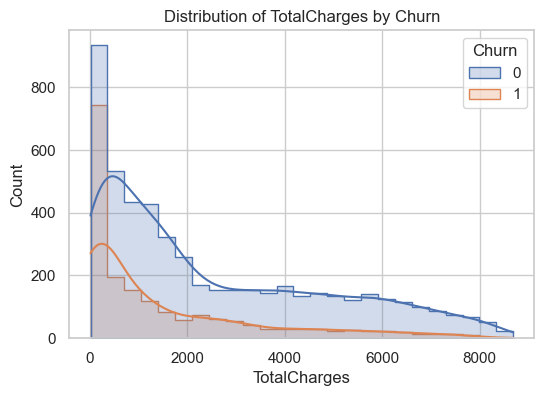

In [15]:
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Churn", kde = True, element = "step")
    plt.title(f"Distribution of {col} by Churn")
    plt.show()

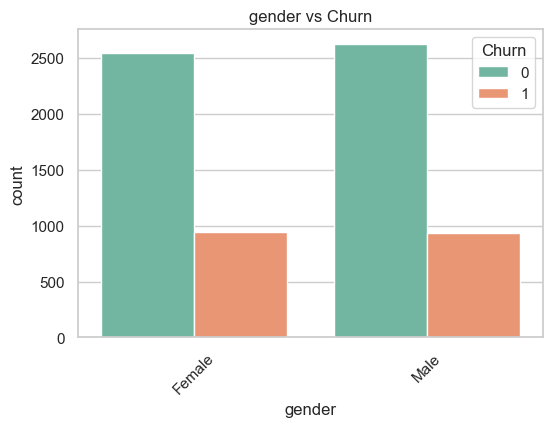

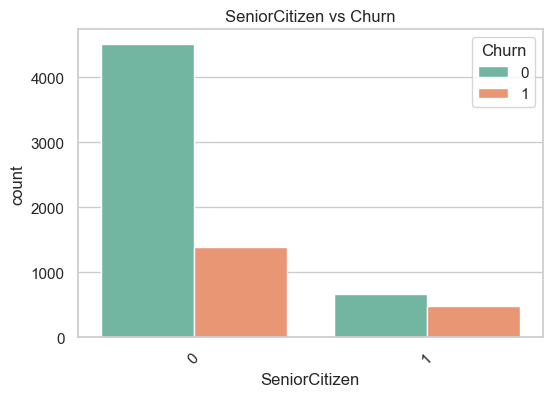

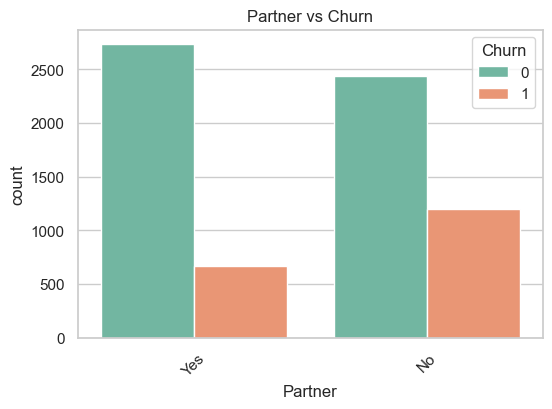

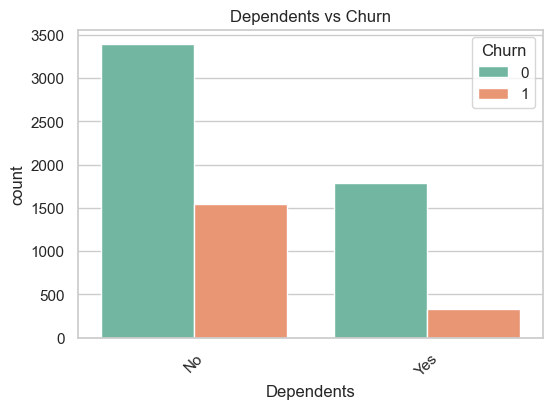

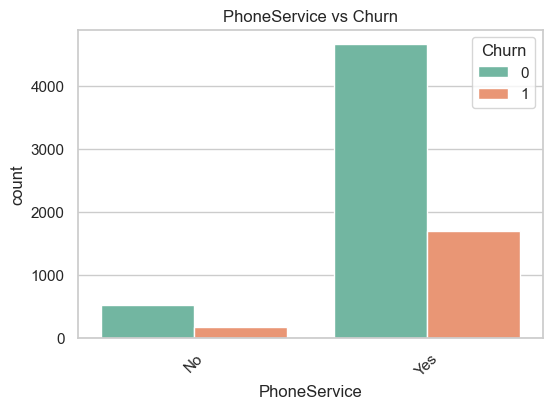

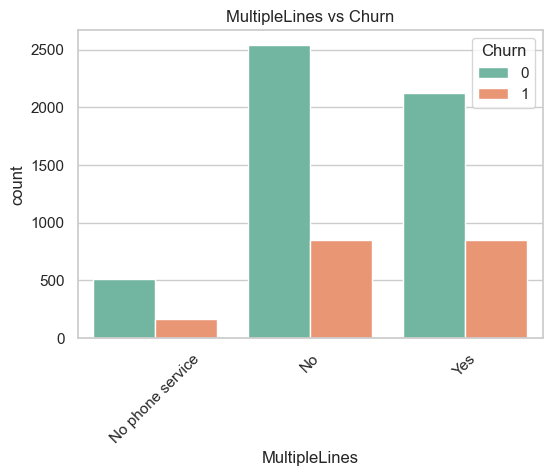

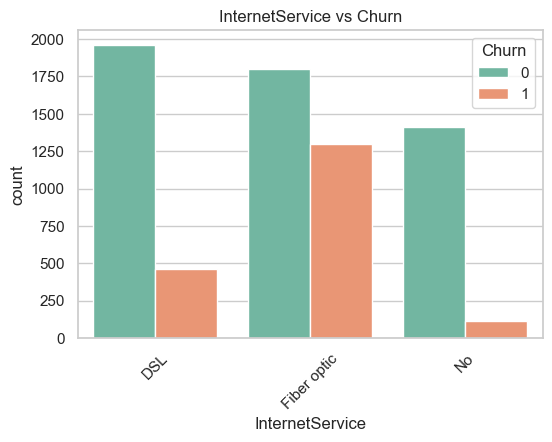

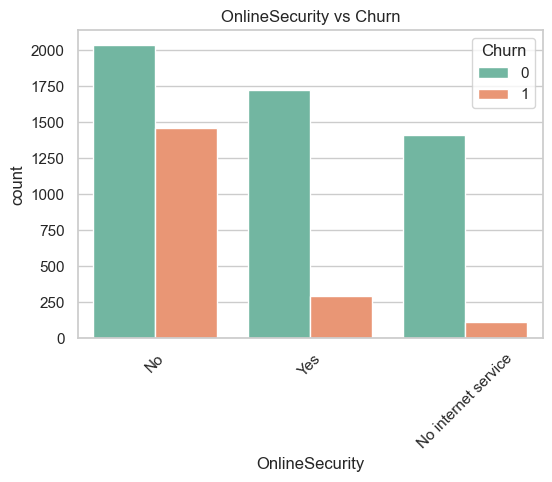

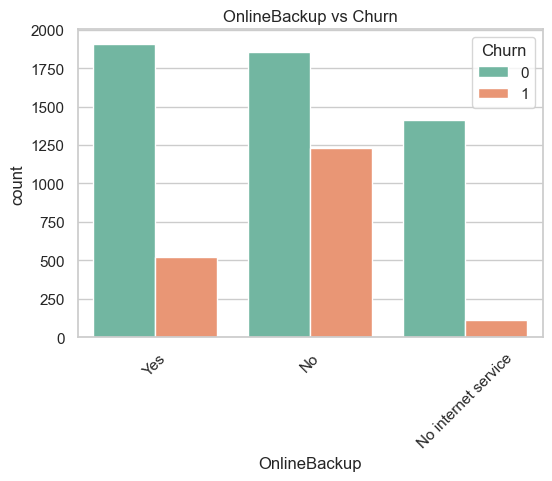

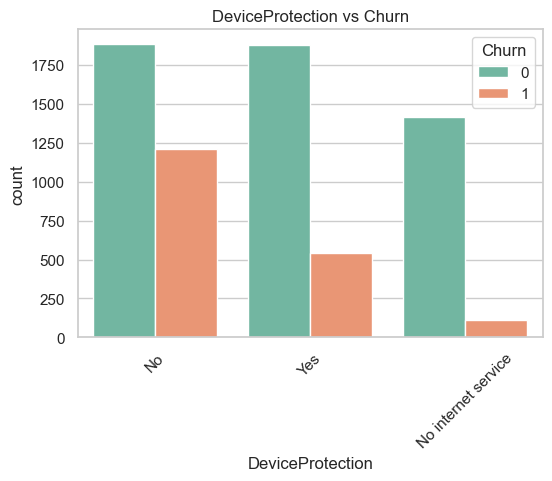

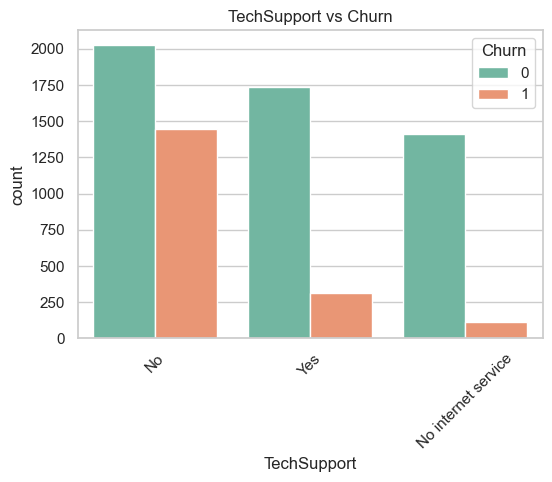

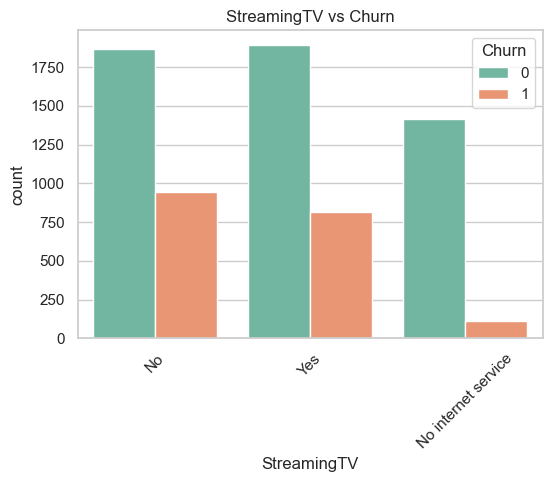

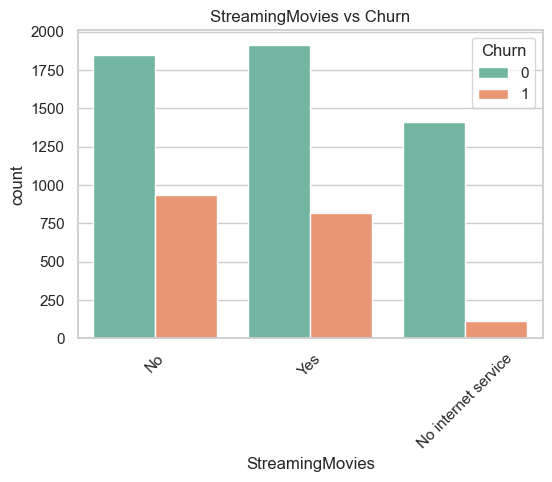

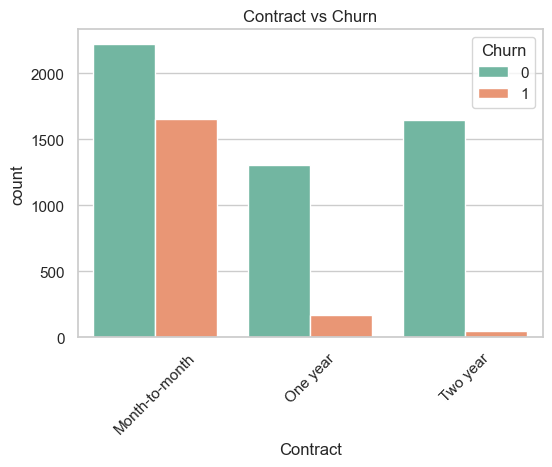

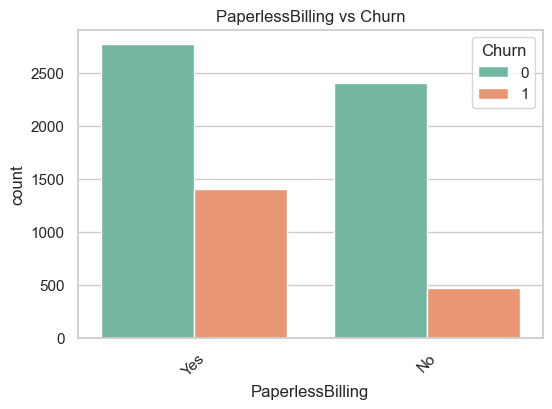

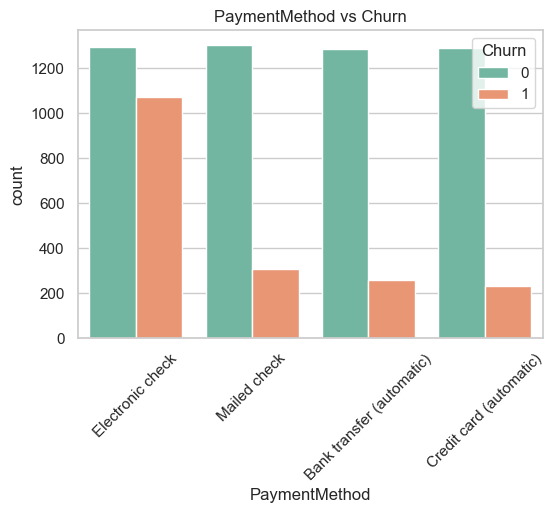

In [16]:
# --- Categorical features overview ---
cat_features = df.drop(columns=num_features + ["Churn"]).columns

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn", palette="Set2")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


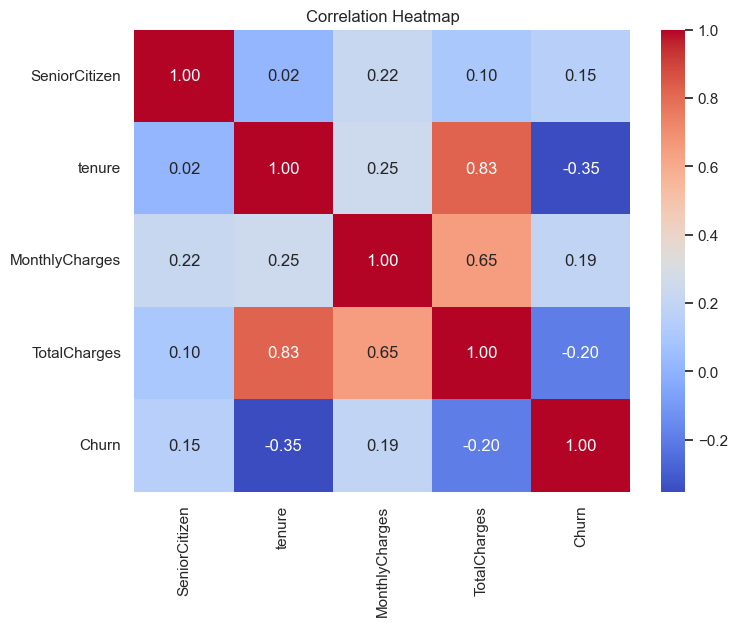

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap="coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocessing
numeric_features = num_features
categorical_features = [col for col in X.columns if col not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [21]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss",  random_state=42)
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("classifier", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:,1]
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_prob)
    }

results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall        F1   ROC_AUC
Logistic Regression  0.805536   0.657233  0.558824  0.604046  0.841882
Random Forest        0.781405   0.615385  0.470588  0.533333  0.818695
XGBoost              0.784954   0.605970  0.542781  0.572638  0.825449


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# 1. Identify categorical and numeric columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

# 2. Preprocessor: encode categoricals, passthrough numerics
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# 3. Define model
xgb = XGBClassifier(
    
    eval_metric="logloss",
    tree_method="hist"
)

# 4. Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb)
])

# 5. Define parameter grid (example, adjust to your needs)
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

# 6. Grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

# 7. Fit
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Best F1 Score: 0.5949681107475465


Test Accuracy: 0.8055358410220014
Test F1 Score: 0.5848484848484848

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



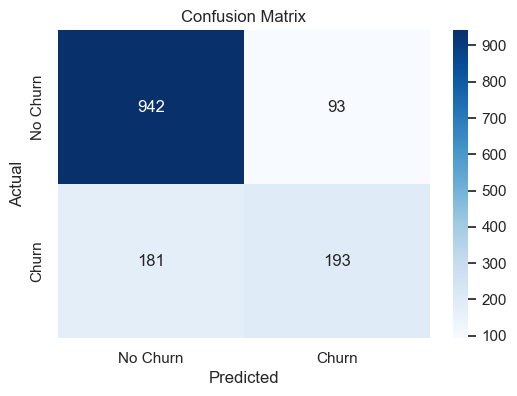

In [29]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get the best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


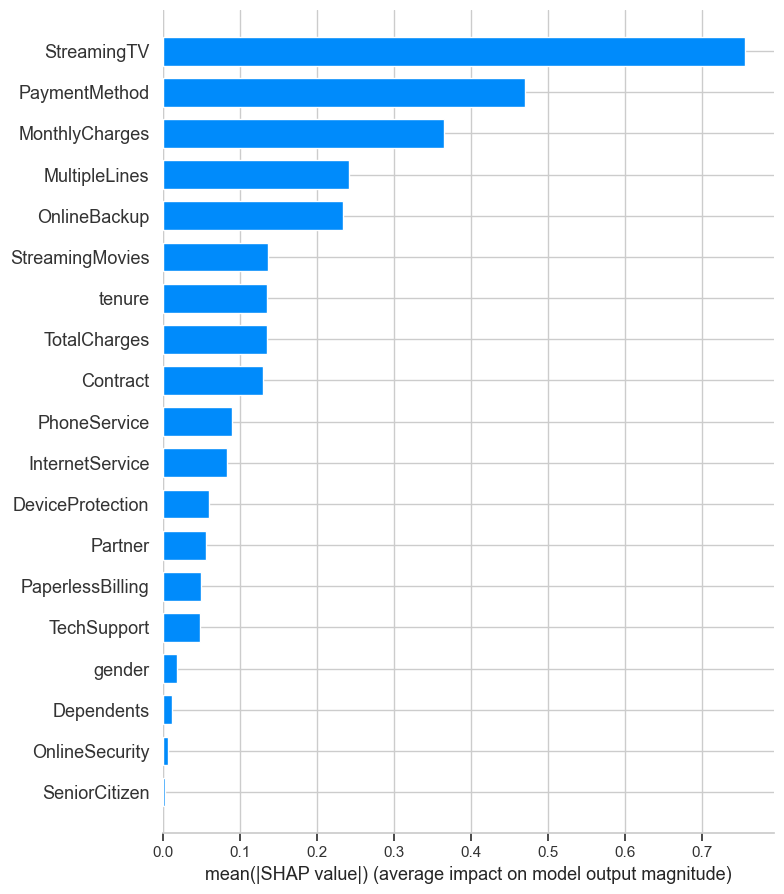

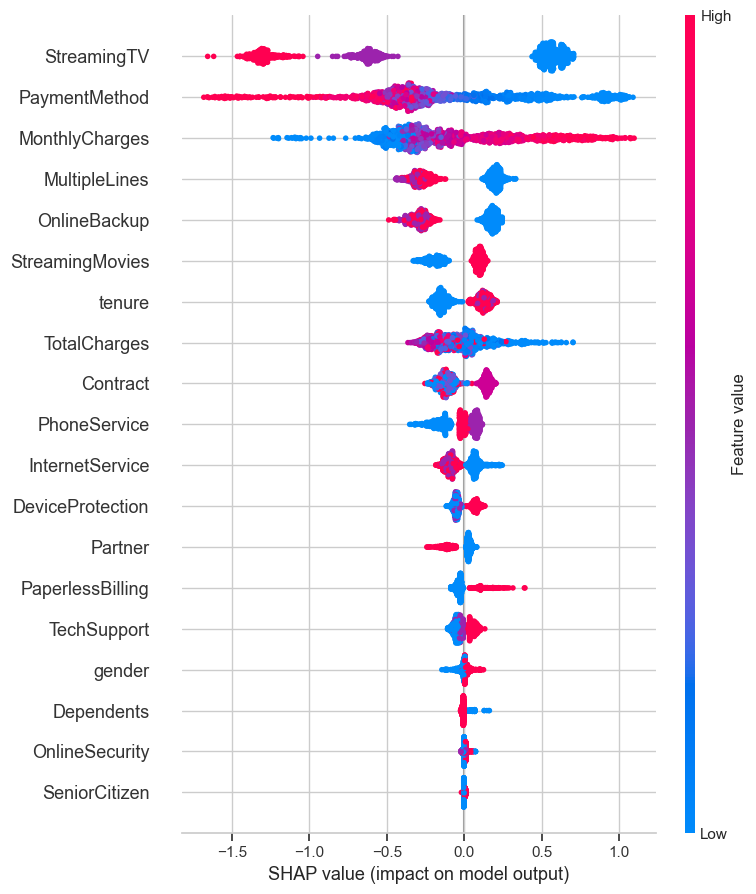

In [30]:
# SHAP Explainability for Churn Model

import shap

shap.initjs()


xgb_model = best_model.named_steps['classifier']

# Preprocess the test data using the pipeline
X_test_preprocessed = best_model.named_steps['preprocessor'].transform(X_test)

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

shap_values = explainer.shap_values(X_test_preprocessed)

shap.summary_plot(shap_values, X_test_preprocessed, feature_names=X_test.columns, plot_type="bar")


shap.summary_plot(shap_values, X_test_preprocessed, feature_names=X_test.columns)


row_idx = 0

shap.force_plot(
    explainer.expected_value,
    shap_values[row_idx, :],
    X_test_preprocessed[row_idx, :],
    feature_names=X_test.columns
)


In [31]:
import joblib

# Save the entire pipeline (preprocessing + model)
joblib.dump(best_model, "churn_model_pipeline.pkl")
print("Pipeline saved as 'churn_model_pipeline.pkl'")


Pipeline saved as 'churn_model_pipeline.pkl'


In [32]:
import joblib
import pandas as pd

# Load saved pipeline
pipeline = joblib.load("churn_model_pipeline.pkl")

# Example input (as if a new customer)
new_customer = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 12,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "Yes",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 70.35,
    "TotalCharges": 845.5
}

# Convert to DataFrame
input_df = pd.DataFrame([new_customer])

# Predict churn
prediction = pipeline.predict(input_df)[0]
proba = pipeline.predict_proba(input_df)[0][1]

print("Churn Prediction:", "Yes" if prediction == 1 else "No")
print("Churn Probability:", round(proba, 2))


Churn Prediction: No
Churn Probability: 0.49


In [33]:
!pip install streamlit


   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.0 MB 5.8 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/10.0 MB 5.5 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/10.0 MB 5.7 MB/s eta 0:00:02
   ----------------- ---------------------- 4.5/10.0 MB 5.6 MB/s eta 0:00:01
   --------------------- ------------------ 5.5/10.0 MB 5.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/10.0 MB 5.5 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/10.0 MB 5.5 MB/s eta 0:00:01
   ------------------------------------- -- 9.4/10.0 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 10.0/10.0 MB 5.3 MB/s  0:00:01
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   ---------------------------------------- 731.2/731.2 kB 4.8 MB/s  0:00:00
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---- --------------

In [1]:
pip install plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.8 MB 1.8 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.8 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.8 MB 1.9 MB/s eta 0:00:05
   ----------- ---------------------------- 2.9/9.8 MB 2.4 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.8 MB 2.6 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.8 MB 2.6 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.8 MB 2.6 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.8 MB 2.7 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 2.6 MB/s eta 0:00:02
   ---------------------------- ----------- 7.1/9.8 MB 2.8 MB/s eta 0:00:01
   -----------------------